In [1]:
from plywood_gallery import ChapterManager
ChapterManager.clean()

In [2]:
import json
from base64 import b64decode
from io import BytesIO, StringIO
from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import PIL


@magic_arguments.magic_arguments()
@magic_arguments.argument(
    "--path",
    "-p",
    default=None,
    help=("the path where the image will be saved to"),
)
@magic_arguments.argument(
    "--celltype",
    "-c",
    default="Normal",
    help=("Cell can be of type 'Normal', 'Header', and 'Dependend'"),
)
@magic_arguments.argument(
    "--style",
    "-s",
    default="",
    help=("Add extra css style for the gallery enteries"),
)
@register_cell_magic
def capture_png(line, cell):
    """Saves the png image and the css style for the html page"""
    args = magic_arguments.parse_argstring(capture_png, line)

    postpath = args.path
    chapter_name= ChapterManager.chapter_name
    chapter_name_underscore = chapter_name.replace(" ", "_")
    prepath = "gallery_assets"
    ChapterManager.cell_counter += 1
    # include chaptername
    path = f"{prepath}/{chapter_name_underscore}_{ChapterManager.cell_counter:03}_{postpath}"

    #path = path.split(".png")[0] + str(time.time_ns()) + ".png"
    if not path:
        raise ValueError('No path found!')

    style = args.style
    style = style.strip('"')  # remove quotes

    styles = {
        'Normal': 'border: 3px solid #007AB8;',
        'Header': 'border: 3px solid #ED6A5A;',
        'Dependend': 'border: 3px solid #A8DCF0;'
    }
    try:
        default_style = styles[args.celltype]
    except KeyError:
        raise ValueError('Not a valid cell type!')

    style = default_style + style

    # print(args.path,args.celltype, args.style)

    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )

    raw_code_block = cell
    code_block = ""

    for codeline in StringIO(raw_code_block):
        if "#NOT" in codeline:
            pass
        else:
            code_block += codeline

    new_codeblock = ""
    for codeline in StringIO(code_block):
        if "#ONLY" in codeline:
            codeline = codeline.replace("#ONLY", "")
            new_codeblock += codeline
        else:
            pass

    if new_codeblock:  # checks if there are lines that include "#ONLY"
        code_block = new_codeblock

    # make sure that javascript can read the single quote character
    code_block = code_block.replace("'", "&#39;")
    code_block = code_block.strip("\n")

    # read + update + write json
    with open(joson_file_path, "r") as jsonFile:
        data = json.load(jsonFile)

    if not chapter_name in data:
        data[chapter_name] = []

    chapter_content = data[chapter_name]
    chapter_content.append(
        [{"image_path": path,
          "celltype": args.celltype,
          "css": style,
          "code": code_block}])

    data[chapter_name] = chapter_content
    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2, sort_keys=False)

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')


# init variables
joson_file_path = "gallery_assets/gallery_parameters.json"


## 2D Arrays

In [3]:
ChapterManager.set_chapter_name("2D Arrays")

(0.0, 1.0, 0.0, 1.0)

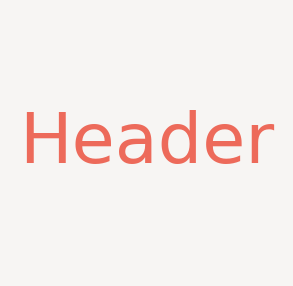

In [4]:
%%capture_png -p Header1.png --celltype Header

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def disp(x, sep='.0f', annot=False,  figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.axis("off")
    sns.heatmap(x, annot=annot, fmt=sep, cmap="YlGnBu", cbar=False)


import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,5), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

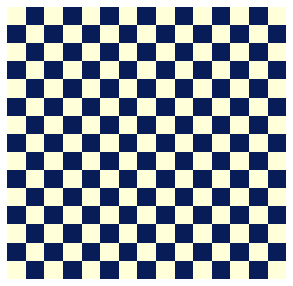

In [5]:
%%capture_png -p Chess.png  
pixX, pixY= (15, 15) 
array = [[(i+j)%2 for i in range(pixX)] for j in range(pixY)]
disp(array)

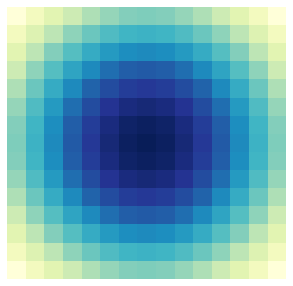

In [6]:
%%capture_png -p Gauss.png
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 1.0, 0.0
array = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(array, sep='.1f' )

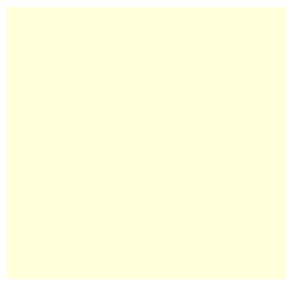

In [7]:
%%capture_png -p Empty.png 
array = np.ones((15,15))
disp(array)

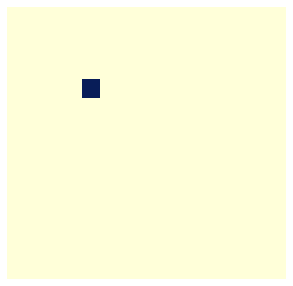

In [8]:
%%capture_png -p EmptyAndElement.png --celltype Dependend
array[4, 4]=2
disp(array)

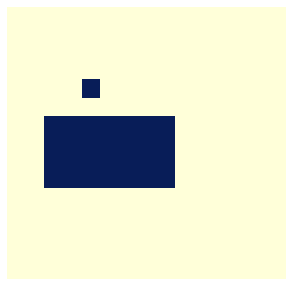

In [9]:
%%capture_png -p EmptyAndTwoElements.png --celltype Dependend
array[6:10, 2:9]=2
disp(array)

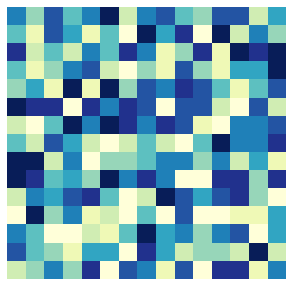

In [10]:
%%capture_png -p Random.png
np.random.seed(42)
array = np.random.randint(0, 10, size=(15, 15))
disp(array)

## 3D Arrays

In [11]:
ChapterManager.set_chapter_name("3D Arrays")

(0.0, 1.0, 0.0, 1.0)

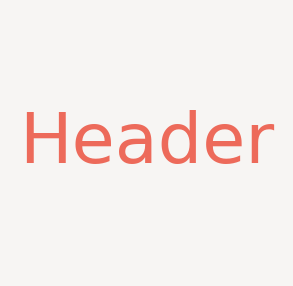

In [12]:
%%capture_png -p Header2.png  --celltype Header --style "width: 150px"

import scipy

def plot_voxels(varray, ax=None, title=None, linewidth=0.8, aspect=None):

    if ax == None:
        fig = plt.figure(figsize=(16/2, 9/2))
        ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.view_init(30, 200)
    colors = cmap(varray)
    ax.voxels(varray, facecolors=colors,
              edgecolor="black", linewidth=linewidth)
    ax.axis("off")
    if aspect:
        ax.set_box_aspect(aspect = aspect) 
    if title:
        ax.set_title(title, fontsize=30)

cmap = plt.get_cmap("YlGnBu")


import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,5), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

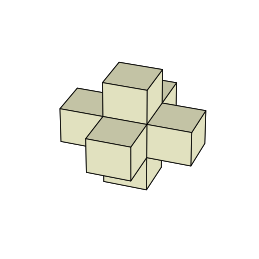

In [13]:
%%capture_png -p BinaryStructure1.png --style "width: 150px"
voxelarrray = scipy.ndimage.generate_binary_structure(3, 1)
plot_voxels(voxelarrray)


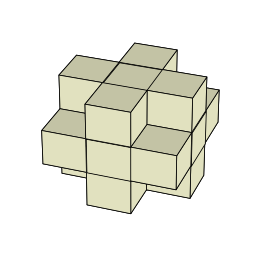

In [14]:
%%capture_png -p BinaryStructure2.png --style "width: 150px"
voxelarrray = scipy.ndimage.generate_binary_structure(3, 2)
plot_voxels(voxelarrray)

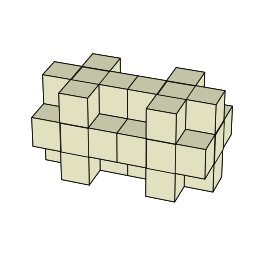

In [15]:
%%capture_png -p BinaryStructureConcat.png  --celltype Dependend --style "width: 150px;"
stacked_array = np.concatenate((voxelarrray, voxelarrray), axis=1)
plot_voxels(stacked_array , aspect=(1,2,1))

## Filtering

In [16]:
ChapterManager.set_chapter_name("Filtering")

(0.0, 1.0, 0.0, 1.0)

<Figure size 1152x648 with 0 Axes>

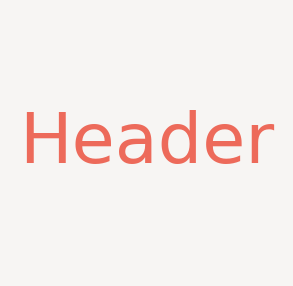

In [17]:
%%capture_png -p Header1.png --celltype Header --style "width: 150px"

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

def make_voxelarray(grids = 2,boxs = 5):
    voxelarray = np.zeros((boxs * grids, boxs * grids, boxs * grids))

    i = 9
    for xi in range(0, 2):
        for yi in range(0, 2):
            for zi in range(0, 2):
                voxelarray[
                    xi * boxs: xi * boxs + boxs,
                    yi * boxs: yi * boxs + boxs,
                    zi * boxs: zi * boxs + boxs,
                ] = i
                i -= 1

    voxelarray = np.uint8(voxelarray * 255 / 8)
    return voxelarray


def plot_voxels(varray, ax=None, title=None, linewidth=0.1, aspect=None):

    if ax == None:
        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.view_init(30, 200)
    colors = cmap(varray)
    ax.voxels(varray, facecolors=colors,
              edgecolor="black", linewidth=linewidth)
    ax.axis("off")
    if aspect:
        ax.set_box_aspect(aspect = aspect) 
    if title:
        ax.set_title(title, fontsize=30)

plt.figure(figsize=(16, 9))

import matplotlib.pyplot as plt #NOT
fix, ax = plt.subplots(figsize=(5,5), facecolor="#F7F5F3") #NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A") #NOT
ax.text(0.5, 0.5, "Header",**text_kwargs) #NOT
ax.axis("off"); #NOT

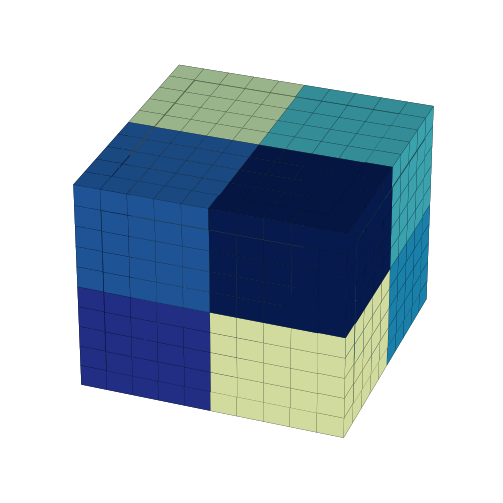

In [18]:
%%capture_png -p GreenArray.png --style "width: 150px"
cmap = plt.get_cmap("YlGnBu")
voxelarray= make_voxelarray()
plot_voxels(voxelarray)

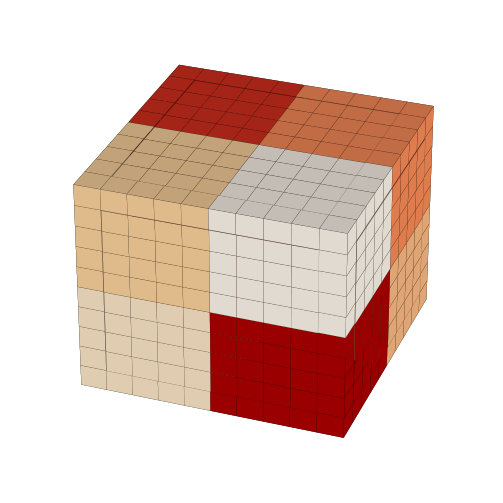

In [19]:
%%capture_png -p RedArray.png --style "width: 150px"
cmap = plt.get_cmap("OrRd_r")
voxelarray= make_voxelarray()
plot_voxels(voxelarray)

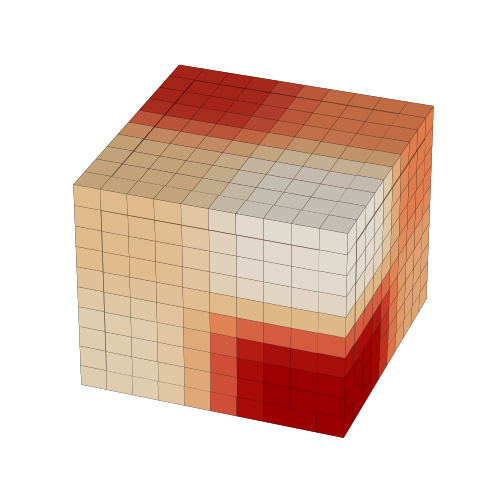

In [20]:
%%capture_png -p RedArraySigma1.png --celltype Dependend --style "width: 150px;"
voxelarray1 = gaussian_filter(voxelarray, sigma=1)
plot_voxels(voxelarray1)

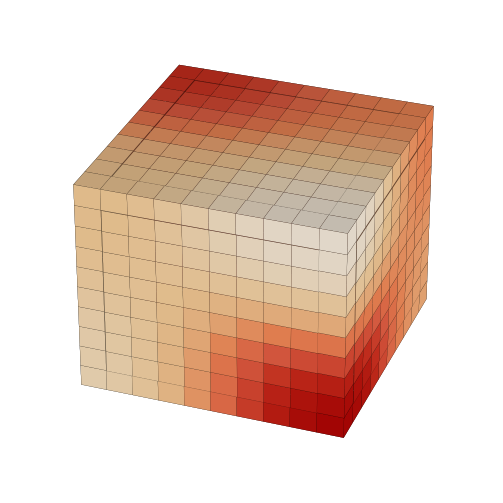

In [21]:
%%capture_png -p RedArraySigma2.png --celltype Dependend --style "width: 150px;"
voxelarray2 = gaussian_filter(voxelarray, sigma=2)
plot_voxels(voxelarray2)

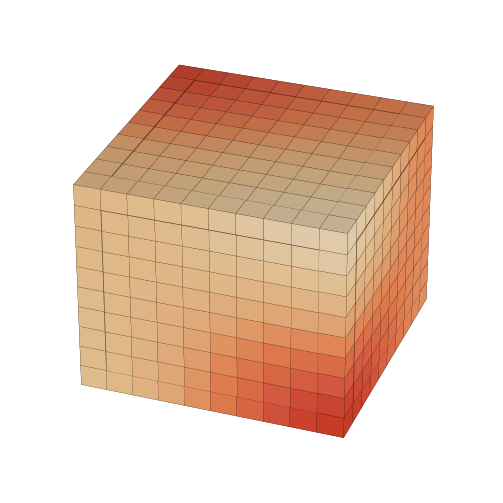

In [22]:
%%capture_png -p RedArraySigma3.png --celltype Dependend --style "width: 150px;"
voxelarray3 = gaussian_filter(voxelarray, sigma=3)
plot_voxels(voxelarray3)